In [1]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import interact
import ipywidgets as widgets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering



In [2]:
pwd

'C:\\Users\\Manish'

### PART- 1

In [3]:
df=pd.read_csv("C:\\Users\\Manish\\music.csv")
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [5]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [7]:
df1=df.drop(['Title','Artist','Top Genre','Year'],axis=1)

In [8]:
df1.head(2)

,Index,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,157,30,53,-14,11,68,201,94,3,71
1,2,135,79,50,-11,17,81,207,17,7,39


In [9]:
music_df_numeric=df1.select_dtypes('number')

std_scaler=StandardScaler()
music_std_scale=std_scaler.fit_transform(music_df_numeric)
music_std_scale

array([[-1.73118239,  1.31273922, -1.3400087 , ...,  2.24590849,
        -0.45335805,  0.79965286],
       [-1.72944513,  0.52761564,  0.87230421, ..., -0.4088327 ,
         0.45563738, -1.43062294],
       [-1.72770787,  1.705301  ,  0.42081178, ..., -0.92599008,
         2.72812596,  0.66026062],
       ...,
       [ 1.72770787,  1.705301  ,  0.91745345, ...,  1.55636532,
         0.45563738,  1.00874122],
       [ 1.72944513,  1.91942561, -1.52060568, ...,  0.86682216,
        -0.2261092 ,  0.38147615],
       [ 1.73118239,  0.45624077, -0.43702384, ...,  1.55636532,
        -0.45335805, -0.24578892]])

In [10]:
new_df1=pd.DataFrame(music_std_scale,columns=music_df_numeric.columns)
new_df1.head()

,Index,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,-1.731182,1.312739,-1.340009,-0.015521,-1.368667,-0.479098,0.748080,-0.656580,2.245908,-0.453358,0.799653
1,-1.729445,0.527616,0.872304,-0.210991,-0.546064,-0.120314,1.271177,-0.592464,-0.408833,0.455637,-1.430623
2,-1.727708,1.705301,0.420812,0.831514,0.002338,-0.718286,0.104268,0.839452,-0.925990,2.728126,0.660261
3,-1.725971,1.883738,1.639841,-0.667086,1.373342,-0.957475,-0.499305,0.070064,-0.994944,-0.226109,1.148133
4,-1.724233,-0.507320,1.007752,0.310261,1.099141,-0.538895,1.512607,-0.068853,-0.960467,-0.453358,-0.036701


In [11]:
corr=df1.corr()

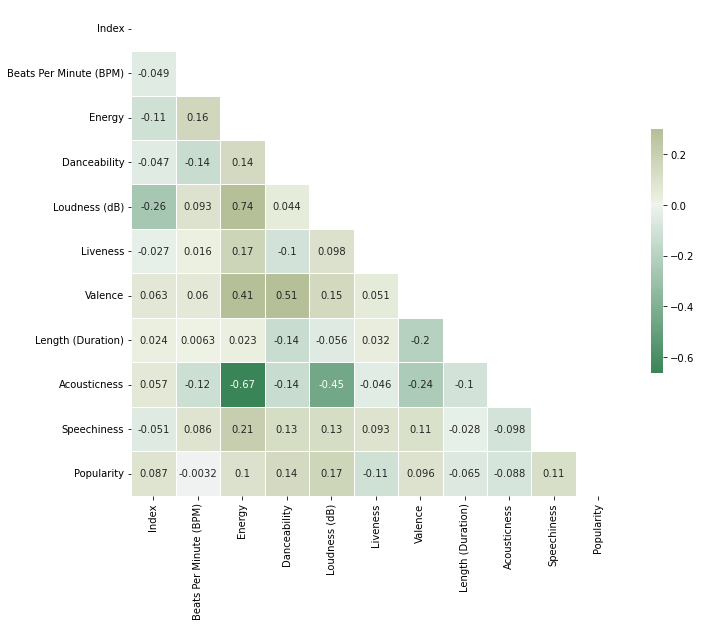

In [12]:
mask = np.triu(np.ones_like(corr, dtype=bool))              
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(500,100, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [13]:
new_df2=new_df1[['Beats Per Minute (BPM)','Popularity']]
new_df2.head()

,Beats Per Minute (BPM),Popularity
0,1.312739,0.799653
1,0.527616,-1.430623
2,1.705301,0.660261
3,1.883738,1.148133
4,-0.507320,-0.036701


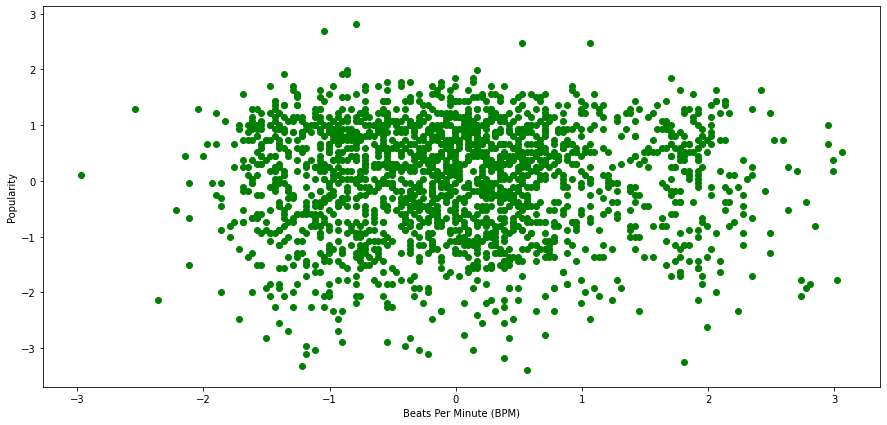

In [14]:
plt.figure(figsize=(15,7))
plt.scatter(new_df2['Beats Per Minute (BPM)'],new_df2['Popularity'],color='g')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Popularity')
plt.show()                      

In [15]:
from sklearn.model_selection import train_test_split
X = music_df_numeric.iloc[:,1:]
y = music_df_numeric.iloc[:,0:1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

pred=reg.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,pred)
print("r2 socre is ",score)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))
print("Mean Squared Error :",mean_squared_error(y_test,pred))                  
print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,pred))) 

r2 socre is  0.08786057774322409
Mean Absolute Error : 472.4880106060141
Mean Squared Error : 308493.58285580477
Mean Squared Root Error : 555.4219862913286


In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rfr= RandomForestRegressor()
rfr = rfr.fit(X_train, y_train)
pred= rfr.predict(X_test)
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
print("r2 socre is ",score)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred))
print("Mean Squared Error :",mean_squared_error(y_test,pred))                  
print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,pred)))

r2 socre is  0.11982913880662938
Mean Absolute Error : 455.0995238095238
Mean Squared Error : 297681.53406090225
Mean Squared Root Error : 545.6019923542273


In [19]:
from sklearn.ensemble import AdaBoostRegressor

rfa = AdaBoostRegressor()
rfa = rfa.fit(X_train,y_train)
pred_ada = rfa.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,pred_ada)
print("r2 socre is ",score)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_ada))
print("Mean Squared Error :",mean_squared_error(y_test,pred_ada))                  
print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,pred_ada)))

r2 socre is  0.061541462047876805
Mean Absolute Error : 494.46543726829634
Mean Squared Error : 317394.9394909185
Mean Squared Root Error : 563.3781496392263


In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

a =  DecisionTreeRegressor()
b =  KNeighborsRegressor()
c  =  LinearRegression() 

level0=[('knn', b),('cart',a)]
model = StackingRegressor(estimators=level0, final_estimator=LinearRegression())
model.fit(X_train,y_train)

ypred = model.predict(X_test)
score=r2_score(y_test,ypred)
print("r2 socre is ",score)
print("Mean Absolute Error :",mean_absolute_error(y_test,ypred))
print("Mean Squared Error :",mean_squared_error(y_test,ypred))                  
print("Mean Squared Root Error :",np.sqrt(mean_squared_error(y_test,ypred)))

r2 socre is  0.013877101153140559
Mean Absolute Error : 494.78813115950095
Mean Squared Error : 333515.44597069424
Mean Squared Root Error : 577.5079618245053


### PART - 2

#### knn

[[ 91.35177305  59.49361702]
 [125.71030928  59.59896907]
 [167.29780564  59.37931034]]
Attributes used for cluster model:  Index(['Beats Per Minute (BPM)', 'Popularity'], dtype='object')


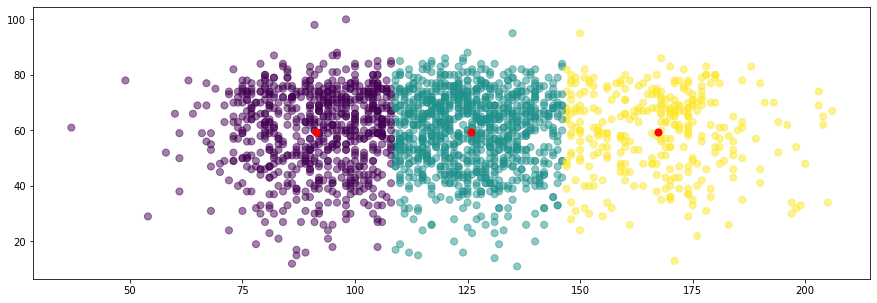

In [21]:
mus  = df1[['Beats Per Minute (BPM)','Popularity']]
kmeans = KMeans(n_clusters=3,n_init=3).fit(mus)
centroids = kmeans.cluster_centers_

print(centroids)

print('Attributes used for cluster model: ', mus.columns)

f, ax = plt.subplots(figsize = (15,5))

plt.scatter(mus['Beats Per Minute (BPM)'], mus['Popularity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

#### Recommending similar songs 

In [22]:
combined_features=df['Title']+'      '+df['Artist']+'     '+['Genre']         #concating Title, Artist and genre in to one 

In [23]:
combined_features

0                      Sunrise      Norah Jones     Genre
1                  Black Night      Deep Purple     Genre
2                  Clint Eastwood      Gorillaz     Genre
3               The Pretender      Foo Fighters     Genre
4       Waitin' On A Sunny Day      Bruce Springsteen ...
                              ...                        
1989        Heartbreak Hotel      Elvis Presley     Genre
1990               Hound Dog      Elvis Presley     Genre
1991           Johnny B. Goode      Chuck Berry     Genre
1992    Take Five      The Dave Brubeck Quartet     Genre
1993            Blueberry Hill      Fats Domino     Genre
Length: 1994, dtype: object

### In Machine Learning, vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [24]:
import difflib                                               #provides classes and functions for comparing sequences.
from sklearn.feature_extraction.text import TfidfVectorizer  #vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.
from sklearn.metrics.pairwise import cosine_similarity      #similar values          

In [25]:
#TF-IDF stands for Term Frequency Inverse Document Frequency of records means, the calculation of how relevant a word in a series is  relevant to a text.

# converting text data to feature value

vectorizer=TfidfVectorizer()     #vectorization  #Convert a collection of raw documents to a matrix of TF-IDF features.

In [26]:
feature_vectors=vectorizer.fit_transform(combined_features)

In [27]:
print(feature_vectors)

  (0, 1036)	0.0809981550988685
  (0, 1364)	0.551325271090189
  (0, 1900)	0.6074689139275269
  (0, 2618)	0.566092980825253
  (1, 2116)	0.5406778544941039
  (1, 660)	0.5298251548631183
  (1, 1878)	0.4787352887869771
  (1, 293)	0.43721818221315556
  (1, 1036)	0.0812745184310498
  (2, 1083)	0.5555659536282332
  (2, 792)	0.5856018210772626
  (2, 533)	0.5856018210772626
  (2, 1036)	0.07407756388502056
  (3, 921)	0.5160251998516706
  (3, 960)	0.5160251998516706
  (3, 2092)	0.6479399116327477
  (3, 2688)	0.20221742731876238
  (3, 1036)	0.0819632188119455
  (4, 2532)	0.3633937978554924
  (4, 404)	0.3606569871434162
  (4, 648)	0.3692272626681821
  (4, 2617)	0.4835179261955271
  (4, 1937)	0.2870032150683264
  (4, 2930)	0.5299882824604718
  (4, 1036)	0.06704255253177915
  :	:
  (1989, 2090)	0.4343646669533285
  (1989, 820)	0.422634238558245
  (1989, 1036)	0.07609715642012518
  (1990, 1246)	0.5962777959794416
  (1990, 727)	0.527163768014662
  (1990, 2090)	0.43054541912530886
  (1990, 820)	0.4189181

In [28]:
#getting the similarity scores using cousing similarity, it gives similar values 

similarity=cosine_similarity(feature_vectors)                    # similar values

In [29]:
print(similarity)

[[1.         0.00658309 0.00600015 ... 0.00537692 0.00473542 0.0053821 ]
 [0.00658309 1.         0.00602062 ... 0.00539527 0.00475157 0.00540047]
 [0.00600015 0.00602062 1.         ... 0.00491751 0.00433082 0.00492225]
 ...
 [0.00537692 0.00539527 0.00491751 ... 1.         0.00388098 0.00441098]
 [0.00473542 0.00475157 0.00433082 ... 0.00388098 1.         0.00388472]
 [0.0053821  0.00540047 0.00492225 ... 0.00441098 0.00388472 1.        ]]


In [30]:
similarity.shape

(1994, 1994)

### For similar songs 

In [31]:
list_title=df['Title'].tolist()                                   #created a variable and then converted all title values into list


In [32]:
title_name= input('Enter your song title : ')                     #took input from user

Enter your song title : Love Me Tender


In [33]:
find_match=difflib.get_close_matches(title_name,list_title)      #for getting closed matching values based on user input 
print(find_match)

['Love Me Tender', 'Lavender', 'Love Is The Drug']


#### For similar Artist

In [34]:
list_artist=df['Artist'].tolist()

In [35]:
list_artist

['Norah Jones',
 'Deep Purple',
 'Gorillaz',
 'Foo Fighters',
 'Bruce Springsteen',
 'City To City',
 'Maroon 5',
 'Muse',
 'The Killers',
 'Eminem',
 'Elvis Presley',
 'The White Stripes',
 'De Dijk',
 'Ten Years After',
 'Arctic Monkeys',
 'Paul de Leeuw',
 'Coldplay',
 'Alanis Morissette',
 'John Miles',
 'Justin Timberlake',
 'Coldplay',
 'Mumford & Sons',
 'Jan Smit',
 'The Killers',
 'BLØF',
 'Ilse DeLange',
 'Editors',
 'Eminem',
 'Herbert Grönemeyer',
 "Youssou N'Dour",
 'Coldplay',
 'Robert Plant',
 'Adele',
 'Norah Jones',
 'Amy Winehouse',
 'Sandy Coast',
 'The Goo Goo Dolls',
 'U2',
 'Foo Fighters',
 'Guus Meeuwis',
 'Santa Esmeralda',
 'Tiësto',
 'Franz Ferdinand',
 'Green Day',
 'Linkin Park',
 'Robbie Williams',
 'Lou Reed',
 'Snow Patrol',
 'Barry White',
 'Saybia',
 'Pearl Jam',
 'BLØF',
 'James Blunt',
 'Metallica',
 'Christina Aguilera',
 'Elbow',
 'U2',
 'Beyoncé',
 'Backstreet Boys',
 'Golden Earring',
 'Rowwen Hèze',
 'Johnny Cash',
 'Doe Maar',
 'Manu Chao',
 '3 

In [36]:
artist= input('Artist name : ') 

Artist name : John Miles


In [37]:
find_match_artist=difflib.get_close_matches(artist,list_artist)      
print(find_match_artist)

['John Miles', 'John Mayer', 'John Mayer']


##### DBSCAN

For n_clusters = 2 The average silhouette_score is : 0.34304667929488897
For n_clusters = 3 The average silhouette_score is : 0.35887410753428634
For n_clusters = 4 The average silhouette_score is : 0.3475273502258862
For n_clusters = 5 The average silhouette_score is : 0.34571638905335705
For n_clusters = 6 The average silhouette_score is : 0.35190483358298036
For n_clusters = 7 The average silhouette_score is : 0.35537203523904753
For n_clusters = 8 The average silhouette_score is : 0.3466895052847725
For n_clusters = 9 The average silhouette_score is : 0.35710246674988
For n_clusters = 10 The average silhouette_score is : 0.3485531911050536


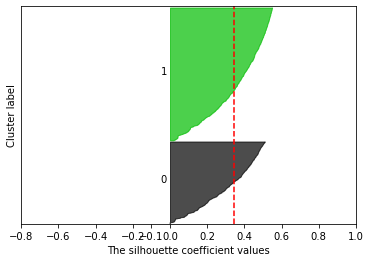

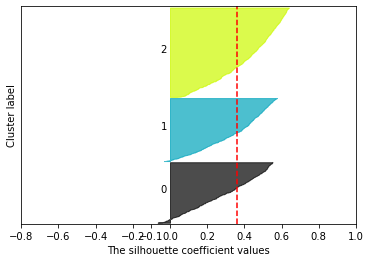

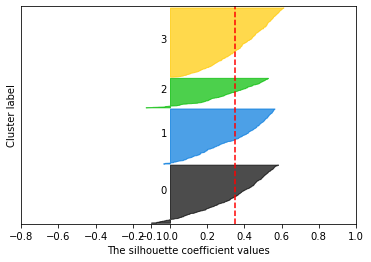

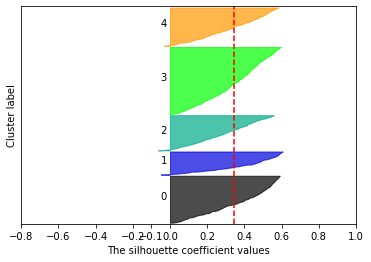

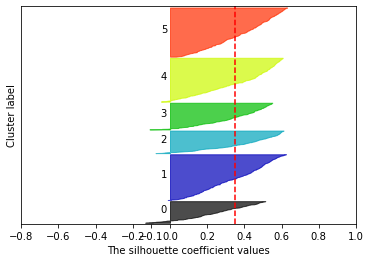

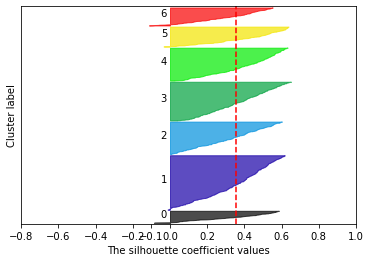

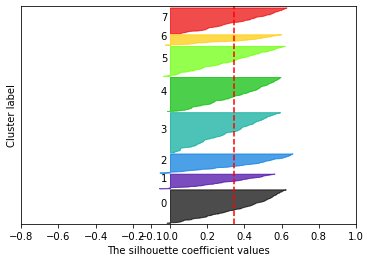

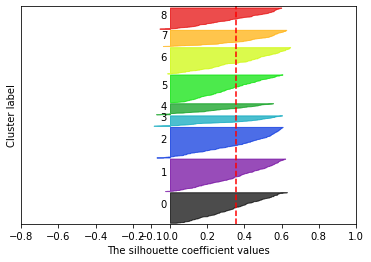

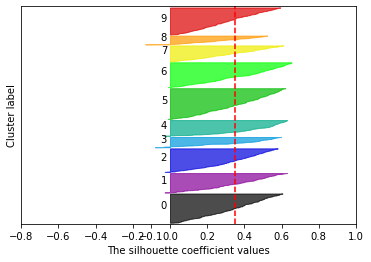

In [38]:
# Silhouette Value
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from ipywidgets import interact
import ipywidgets as widgets
import scipy.cluster.hierarchy as shc
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(new_df2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(new_df2)

    silhouette_avg = silhouette_score(new_df2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(new_df2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x = silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

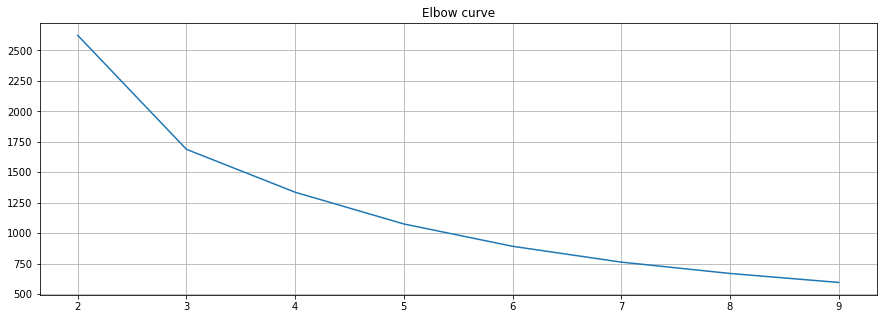

In [39]:
distorsions = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(new_df2)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()                                        

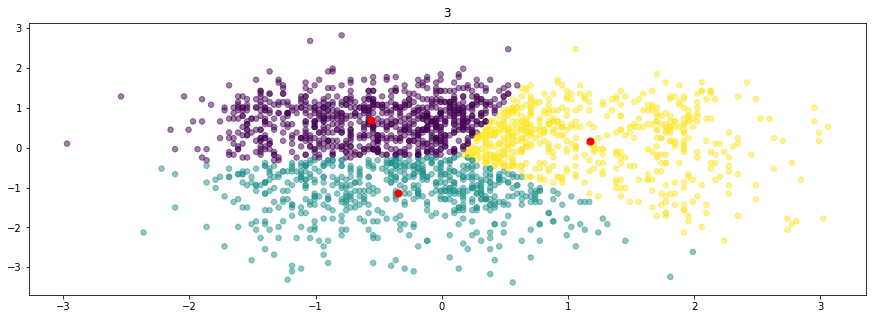

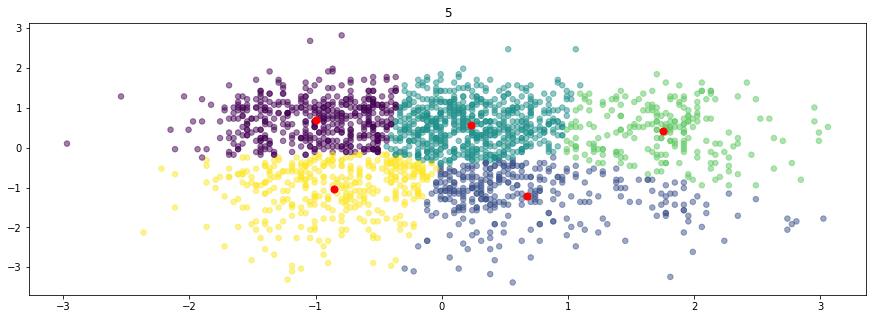

In [41]:
k = [3,5]

for k in k:
    kmeans = KMeans(n_clusters = k, n_init = 3).fit(new_df2)
    centroids = kmeans.cluster_centers_
    f, ax = plt.subplots(figsize = (15,5))
    plt.scatter(new_df2['Beats Per Minute (BPM)'], new_df2['Popularity'], c = kmeans.labels_.astype(float), s = 30, alpha = 0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c ='red', s = 50)
    plt.title(k)
    plt.show()

In [42]:
clusterer = KMeans(n_clusters = 2, random_state=10)
cluster_labels = clusterer.fit_predict(new_df2)

df['cluster'] = cluster_labels
df['cluster'] 

0       1
1       0
2       1
3       1
4       1
       ..
1989    1
1990    1
1991    1
1992    1
1993    0
Name: cluster, Length: 1994, dtype: int32

In [43]:
df.rename(columns = {'Top Genre':'Genre'}, inplace = True)

In [44]:
for cluster in df.cluster.unique():
    print(cluster)
    print(df[df.cluster == cluster].Genre.value_counts())
    print('************************************************************************************************')
    print(df[df.cluster == cluster].Artist.value_counts())
    print('************************************************************************************************')
    print('************************************************************************************************')

1
album rock           275
adult standards       94
alternative rock      76
dance pop             65
alternative metal     60
                    ... 
danish pop             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Genre, Length: 120, dtype: int64
************************************************************************************************
The Beatles                 35
Coldplay                    25
Michael Jackson             20
David Bowie                 17
Bruce Springsteen           16
                            ..
Stealers Wheel               1
Acda en de Munnik            1
Barry Manilow                1
Bachman-Turner Overdrive     1
The Dave Brubeck Quartet     1
Name: Artist, Length: 500, dtype: int64
************************************************************************************************
************************************************************************************************
0
album rock

In [45]:
def fit_and_plot_clustering(df, clusterer,x,y, print_number=False):
    df = df.copy()
    df['clusterid'] = clusterer.fit_predict(df[[x, y]])
    n_clusters = df['clusterid'].max() + 1
    n_outliers = np.sum(df['clusterid'] == -1)
    if print_number:
        print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')
    cmap = plt.get_cmap('Set1', n_clusters+1)
    ax = df.plot(kind='scatter', x=x, y=y, c='clusterid', cmap=cmap, s=80, colorbar=False)
    ax.grid()
    
    return df
    
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

In [46]:
def plot_dbscan(eps = 0.3, min_samples = 10):
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    lable_df = fit_and_plot_clustering(new_df2, dbscan, 'Beats Per Minute (BPM)', 'Popularity', print_number = True)
    
i = interact(plot_dbscan
            , eps = widgets.SelectionSlider(options = np.arange(1.5, 2.0, 0.1), description='Epsilon', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , min_samples=widgets.SelectionSlider(options=range(1, 21), description='Minimum of samples', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True));

interactive(children=(SelectionSlider(continuous_update=False, description='Epsilon', layout=Layout(width='400…